In [51]:
import boto3
import json
from boto3 import client
from boto3.session import Session
from IPython.display import Image

In [16]:
#aws access and secret key
AWS_ACCESS_KEY_ID='AWS_ACCESS_KEY_ID'
AWS_SECRET_ACCESS_KEY='AWS_SECRET_ACCESS_KEY'

In [56]:
#DataAccessRoleArn Creation
Inorder to use the Comprehend Medical service to access the S3 bucket that contains the medication_input.json object, 
Data access role is created with trust policy to assume thr role for the account in order to trust 
the Comprehend Medical service principal.

{
  "Version": "2012-10-17",
  "Statement": [
    {
      "Effect": "Allow",
      "Principal": {
        "Service": "comprehendmedical.amazonaws.com"
      },
      "Action": "sts:AssumeRole"
    }
  ]
}

Custom s3 policy involving get,list and put access is created and attached to the role

{
    "Version": "2012-10-17",
    "Statement": [
        {
            "Action": [
                "s3:GetObject"
            ],
            "Resource": [
                "arn:aws:s3:::awsbucketcm25/*"
            ],
            "Effect": "Allow"
        },
        {
            "Action": [
                "s3:ListBucket"
            ],
            "Resource": [
                "arn:aws:s3:::awsbucketcm25"
            ],
            "Effect": "Allow"
        },
        {
            "Action": [
                "s3:PutObject"
            ],
            "Resource": [
                "arn:aws:s3:::targetbucketcm25/*"
            ],
            "Effect": "Allow"
        }
    ]
}

In [49]:
def get_entity_detection():
    #Establish Client connection for medical comprehend service using boto3
    client = boto3.client(service_name='comprehendmedical',aws_access_key_id=AWS_ACCESS_KEY_ID,
                          aws_secret_access_key=AWS_SECRET_ACCESS_KEY,region_name='us-east-1')
    msgs=client.start_entities_detection_v2_job(InputDataConfig={
        'S3Bucket': 'awsbucketcm25',
        'S3Key': 'input'
    },
    OutputDataConfig={
        'S3Bucket': 'targetbucketcm25',
        'S3Key': 'output'
    },
    DataAccessRoleArn='arn:aws:iam::<Account-ID>:role/<Role-name>',
    JobName='MedicalComprehand_S3',
    LanguageCode='en')
    
    print msgs

In [50]:
get_entity_detection()

{'ResponseMetadata': {'RetryAttempts': 0, 'HTTPStatusCode': 200, 'RequestId': 'f50f5c90-3cce-475a-b574-eea464050df5', 'HTTPHeaders': {'date': 'Sun, 02 Feb 2020 07:09:24 GMT', 'x-amzn-requestid': 'f50f5c90-3cce-475a-b574-eea464050df5', 'content-length': '44', 'content-type': 'application/x-amz-json-1.1', 'connection': 'keep-alive'}}, u'JobId': u'd986028ddae838144ffe59cac79f5615'}


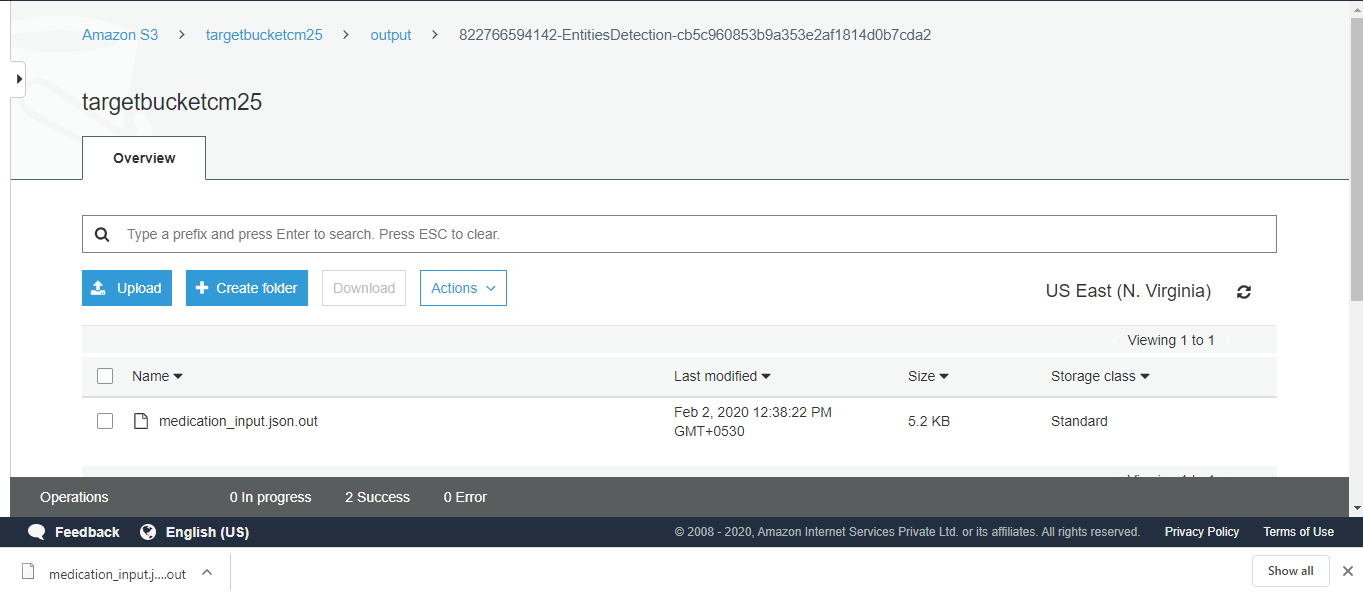

In [52]:
Image(filename='aws/entities_detection_v2_out.png')

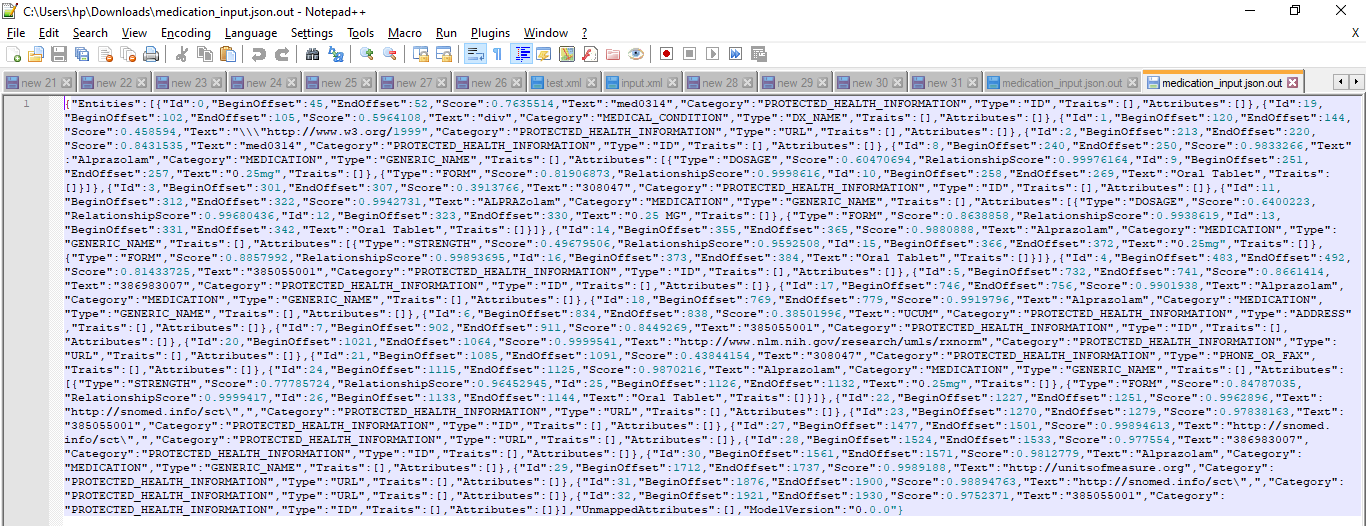

In [53]:
Image(filename='aws/get_entity_detection_output.png')